In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

original_df = pd.read_csv("EWKino-train.csv")
output_df = pd.read_csv("prediction-vs-target-6layer-128node-72epoch.csv")
sorted_output_df = output_df.sort_values(by="Predictions")

In [127]:
mean_DM = original_df["DM_relic_density"].mean()
std_DM = original_df["DM_relic_density"].std()
print(f"mean_DM: {mean_DM}, std_DM: {std_DM}")

predictions = sorted_output_df["Predictions"].values
targets = sorted_output_df["Targets"].values

# Unnormalise the targets and predictions so that we can compare with original targets. unf stands for unnormalised form
unf_targets = targets * std_DM
unf_targets += mean_DM
unf_predictions = predictions * std_DM
unf_predictions += mean_DM

print((np.abs(unf_predictions-unf_targets)).mean())
print((np.abs(unf_targets)).mean())

mean_DM: -2.0304014754468027, std_DM: 3.491936694330024
0.7270313843247578
3.4293323683676973


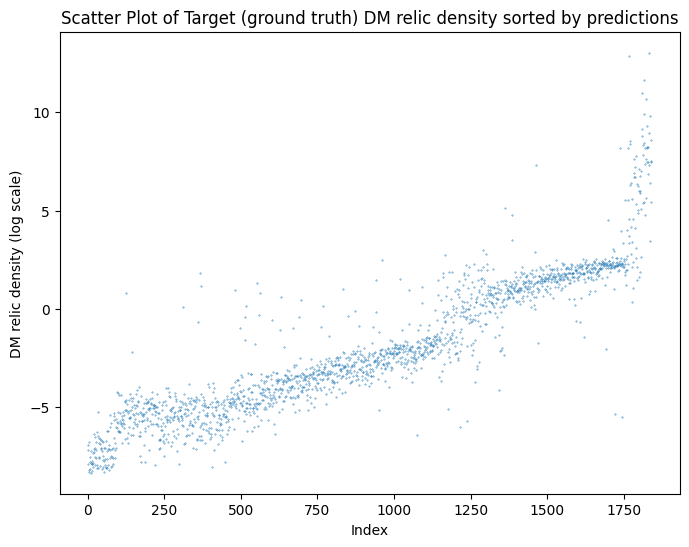

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(unf_targets)), unf_targets, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("DM relic density (log scale)")
plt.title(f"Scatter Plot of Target (ground truth) DM relic density sorted by predictions")

# Save the plot
plt.savefig(f"plots/DM-targets.png")

# Show the plot
plt.show()

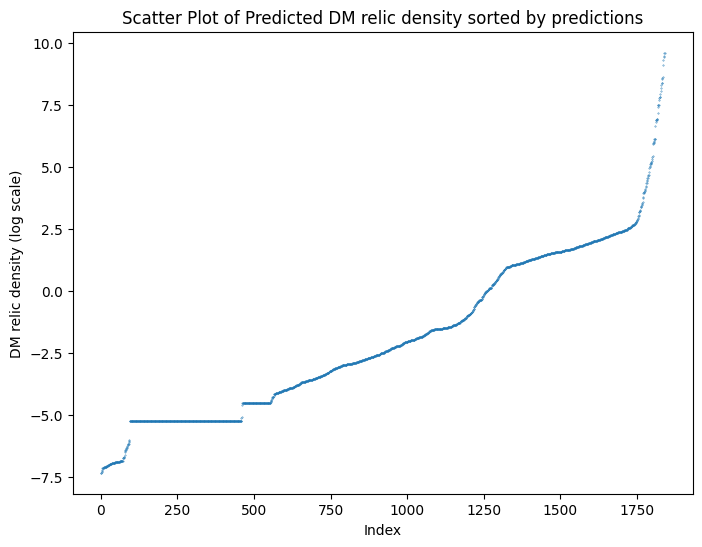

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(unf_predictions)), unf_predictions, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("DM relic density (log scale)")
plt.title(f"Scatter Plot of Predicted DM relic density sorted by predictions")

# Save the plot
plt.savefig(f"plots/DM-predictions.png")

# Show the plot
plt.show()